In [1]:
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset
d = pd.read_csv('class1.csv')
print(d[:10])
x = d.iloc[:, :-1].values
y = d.iloc[:, [-1]].values

   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0
5   27            58000          0
6   27            84000          0
7   32           150000          1
8   25            33000          0
9   35            65000          0


In [3]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3)

In [4]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [5]:
def getInputs(x,y):
    #dims of theta : (no_of_variable+1,1)
    #dims of x : (m,no_of_variable)
    #dims of y : (m,1)
    #initilizing theta
    theta=np.zeros(shape=(x.shape[1]+1,1))
    #horizontal stacking of x with ones for evaluation of theta0
    ones=np.ones(shape=(x.shape[0],1))
    x=np.hstack((ones,x))
    #new dims of x : (m,no_of_variable+1)
    #reshaping y:
    y=y.reshape((y.shape[0],1))
    print("X Shape : ",x.shape)
    print("Y Shape : ",y.shape)
    print("Theta Shape : ",theta.shape)
    return x,y,theta

In [6]:
def sigmoid(z):
    return np.around(1/(1+np.exp(-z)))

In [7]:
#hypothesis function
def h(x,theta):
    #h(x)=x.theta
    return sigmoid(np.dot(x,theta))

In [8]:
#gradient descent function
def gradientDescent(x,y,alpha=0.0):
    x,y,theta=getInputs(x,y)
    #taking 1000 iterations for convergence
    for i in range(2000):
        theta=theta-alpha*(1/x.shape[0])*np.sum((h(x,theta)-y)*x,axis=0).reshape((theta.shape[0],1))
    return(theta)

In [9]:
theta=gradientDescent(x_train,y_train,alpha=0.02)
print(theta)

X Shape :  (266, 3)
Y Shape :  (266, 1)
Theta Shape :  (3, 1)
[[0.00015038]
 [0.00433414]
 [0.00186016]]


In [10]:
def predict(x,theta):
    #horizontal stacking of x with ones for evaluation of theta0
    tx=x
    ones=np.ones(shape=(x.shape[0],1))
    x=np.hstack((ones,x))
    out=h(x,theta)
    return out

In [11]:
y_pred=predict(x_test,theta)

In [12]:
#confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[70 18]
 [ 3 43]]


0.8432835820895522

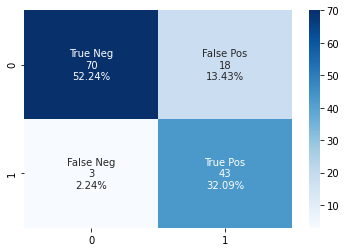

In [13]:
import seaborn as sns
def drawCmPlot(cf_matrix):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

drawCmPlot(cm)

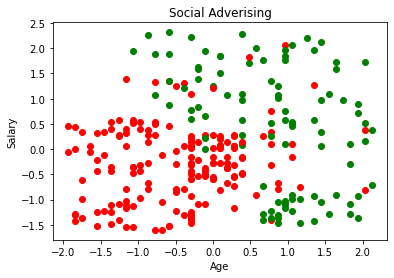

In [14]:
# Visualising the Training set results
import matplotlib.pyplot as plt
cls_clr={0:"red",1:"green"}
for i in range(x_train.shape[0]):
    plt.scatter(x_train[i,0],x_train[i,1], color=cls_clr[y_train[i,0]])
plt.title('Social Adverising')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

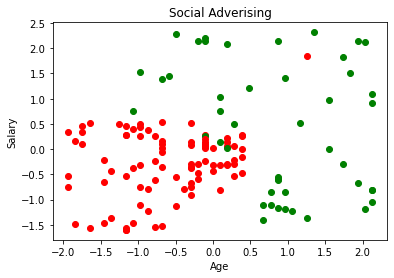

In [15]:
#visualising teh Test set results
for i in range(x_test.shape[0]):
    plt.scatter(x_test[i,0],x_test[i,1], color=cls_clr[y_test[i,0]])
plt.title('Social Adverising')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

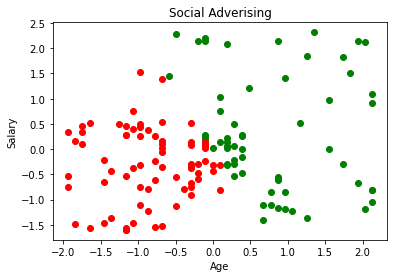

In [16]:
# Visualising the Test-pred set results
for i in range(x_test.shape[0]):
    plt.scatter(x_test[i,0],x_test[i,1],color=cls_clr[y_pred[i,0]])
plt.title('Social Adverising')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()